impoets

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import ParameterEstimator
from pgmpy.estimators import MaximumLikelihoodEstimator


# Load the CSV file into a DataFrame

In [22]:



file_path = 'customer_churn.csv'


df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to inspect the data
print(df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

# pairplot

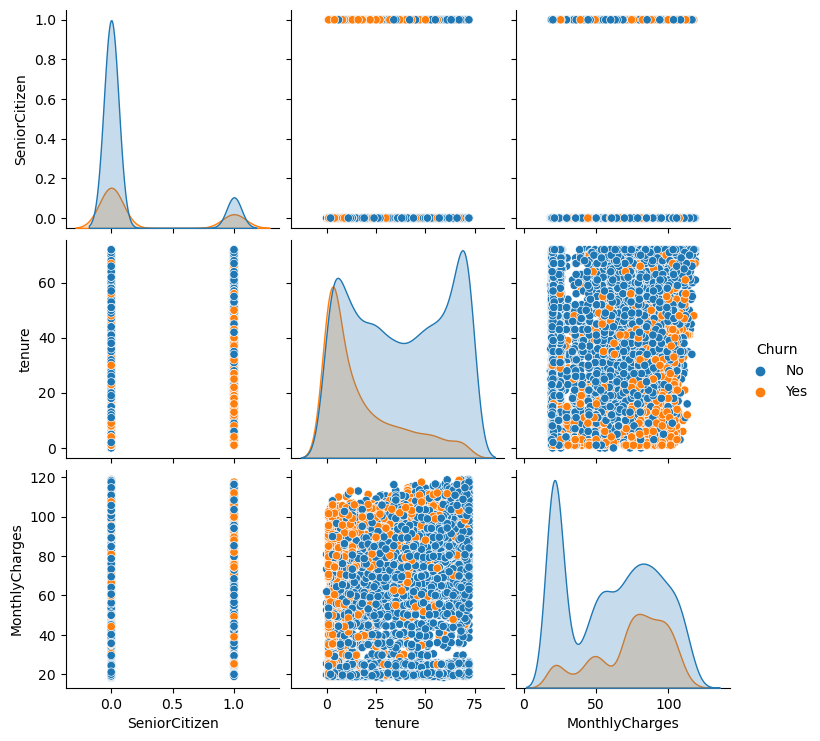

In [23]:
sns.pairplot(df, hue='Churn')
plt.show()

# Calculate the percentage of missing values in each column

In [24]:

missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display the result
print(missing_percentage)

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


# convert_to_numeric

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

def convert_to_numeric(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = pd.Categorical(df[column]).codes
    return df


df = convert_to_numeric(df)
print(df)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           5375       0              0        1           0       1   
1           3962       1              0        0           0      34   
2           2564       1              0        0           0       2   
3           5535       1              0        0           0      45   
4           6511       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038        4853       1              0        1           1      24   
7039        1525       0              0        1           1      72   
7040        3367       0              0        1           1      11   
7041        5934       1              1        1           0       4   
7042        2226       1              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0                0              1                0          

# find corr

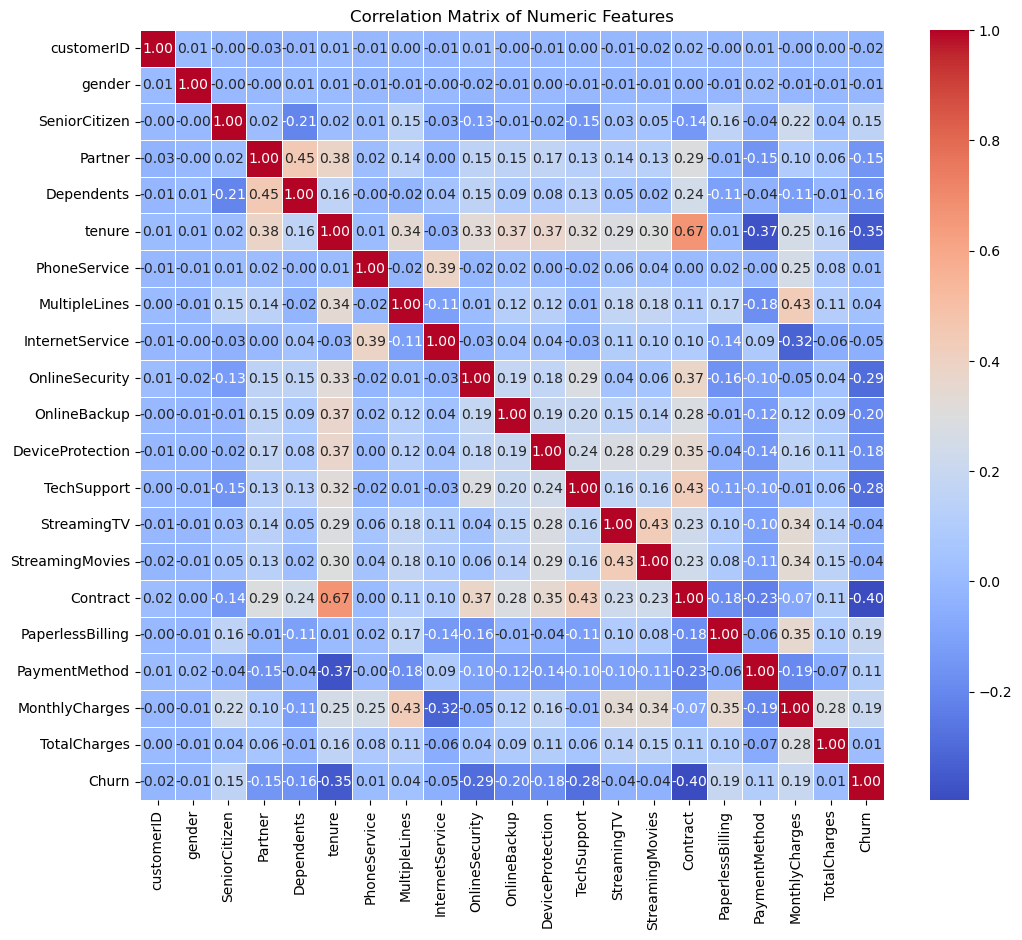

In [26]:



correlation_matrix = df.corr(numeric_only=True)

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [27]:

highly_correlated_features = np.where(np.abs(correlation_matrix) > 0.6)
correlated_features = [(correlation_matrix.index[x], correlation_matrix.columns[y])
                       for x, y in zip(*highly_correlated_features) if x != y and x < y]

print('correlated_features :')
print(correlated_features)

correlated_features :
[('tenure', 'Contract')]


 # Distribution of Churn

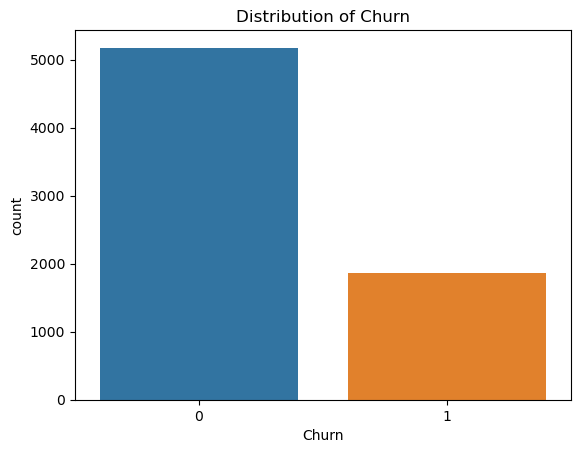

In [28]:
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

In [29]:
features = df.drop('Churn', axis=1)  # Features
labels = df['Churn']  # Labels

# RandomOverSampler 

In [30]:
# Use RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(features, labels)

# Display the count of samples for each class after resampling
print(pd.Series(y_resampled).value_counts())

0    5174
1    5174
Name: Churn, dtype: int64


# Split the data into training and testing sets 

In [31]:


features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.2, random_state=42, stratify=labels)




In [32]:
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import ParameterEstimator, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Define the structure of the Bayesian Network
model = BayesianNetwork ([ ('PaymentMethod', 'Churn'), ('MonthlyCharges', 'Churn'), ('TotalCharges', 'Churn')])

# Use Maximum Likelihood Estimation to fit the model parameters
model.fit(train_data, estimator=MaximumLikelihoodEstimator,)
# Extract the features (excluding the target variable 'Churn') from the test set
features_test = test_data.drop('Churn', axis=1)

# Predict the target variable 'Churn'
predictions = model.predict(features_test)

# # Convert predictions to binary (Yes/No) based on a threshold, e.g., 0.5
threshold = 0.5
binary_predictions = ['Yes' if p > threshold else 'No' for p in predictions['Churn']]

# Calculate accuracy
accuracy = accuracy_score(test_data['Churn'], binary_predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')
